In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [6]:
df = pd.read_excel('./농넷_영주시_일별사과.xlsx')

In [3]:
from pycaret.classification import *

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(df['등급명'])
df['등급명'] = encoder.transform(df['등급명'])
df

,DATE,거래단위,평균가격(원),총거래물량(kg),총거래금액(원),시장명,법인명,품목명,품종명,산지명,산지시군명,등급명
0,2024-03-13,10.0,62366.666667,1800.0,11226000,서울가락도매,동화청과,사과,미시마,경상북도,영주시,3
1,2024-03-13,10.0,95000.000000,3840.0,36480000,서울가락도매,서울청과,사과,후지,경상북도,영주시,3
2,2024-03-13,10.0,60900.000000,1200.0,7308000,수원도매시장,경기청과,사과,미얀마,경북,영주시,3
3,2024-03-13,10.0,61300.000000,600.0,3678000,인천삼산도매,경인농산,사과,미시마,경상북도,영주시,3
4,2024-03-13,20.0,152875.568182,3520.0,26906100,안동도매시장,안동청과,사과,미얀마,경북,영주시,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65184,2020-01-03,10.0,24833.333333,2400.0,5960000,서울가락도매,농협가락(공),사과,미안마,경북,영주시,3
65185,2020-01-03,10.0,20000.000000,300.0,600000,서울가락도매,농협가락(공),사과,후지,경북,영주시,3
65186,2020-01-03,18.0,25200.000000,2700.0,3780000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3
65187,2020-01-03,18.0,25200.000000,1620.0,2268000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3


In [5]:
df_temp = df[['등급명', '총거래물량(kg)', '평균가격(원)', '총거래금액(원)', '거래단위']]
df_temp

,등급명,총거래물량(kg),평균가격(원),총거래금액(원),거래단위
0,3,1800.0,62366.666667,11226000,10.0
1,3,3840.0,95000.000000,36480000,10.0
2,3,1200.0,60900.000000,7308000,10.0
3,3,600.0,61300.000000,3678000,10.0
4,0,3520.0,152875.568182,26906100,20.0
...,...,...,...,...,...
65184,3,2400.0,24833.333333,5960000,10.0
65185,3,300.0,20000.000000,600000,10.0
65186,3,2700.0,25200.000000,3780000,18.0
65187,3,1620.0,25200.000000,2268000,18.0


C:\Users\jhi08\AppData\Local\Temp\ipykernel_18600\3772546017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index1)
C:\Users\jhi08\AppData\Local\Temp\ipykernel_18600\3772546017.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index2)
C:\Users\jhi08\AppData\Local\Temp\ipykernel_18600\3772546017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,등급명,총거래물량(kg),평균가격(원),총거래금액(원),거래단위
0,3,1800.0,62366.666667,11226000.0,10.0
1,3,NaN,95000.000000,NaN,10.0
2,3,1200.0,60900.000000,7308000.0,10.0
3,3,600.0,61300.000000,3678000.0,10.0
4,0,3520.0,NaN,NaN,20.0
...,...,...,...,...,...
65184,3,2400.0,24833.333333,5960000.0,10.0
65185,3,300.0,20000.000000,600000.0,10.0
65186,3,2700.0,25200.000000,3780000.0,18.0
65187,3,1620.0,25200.000000,2268000.0,18.0


In [6]:
df_temp.isnull().sum()

등급명          0
총거래물량(kg)    0
평균가격(원)      0
총거래금액(원)     0
거래단위         0
dtype: int64

Unnamed: 0       0
등급명              0
총거래물량(kg)     4022
평균가격(원)        493
총거래금액(원)      4345
거래단위             0
dtype: int64

In [7]:
import numpy as np
# scikit-learn에서 R의 MICE 패키지를 따라서 실험적으로 개발 중
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [8]:
df_temp.isnull().sum()

등급명          0
총거래물량(kg)    0
평균가격(원)      0
총거래금액(원)     0
거래단위         0
dtype: int64

                등급명  총거래물량(kg)   평균가격(원)  총거래금액(원)      거래단위
등급명        1.000000   0.150649 -0.258284  0.177232 -0.718478
총거래물량(kg)  0.150649   1.000000 -0.001281  0.860528 -0.028105
평균가격(원)   -0.258284  -0.001281  1.000000  0.156435  0.412628
총거래금액(원)   0.177232   0.860528  0.156435  1.000000 -0.115027
거래단위      -0.718478  -0.028105  0.412628 -0.115027  1.000000


In [10]:
s = setup(df_temp, target = '등급명')

,Description,Value
0,Session id,5788
1,Target,등급명
2,Target type,Multiclass
3,Original data shape,"(65189, 5)"
4,Transformed data shape,"(65189, 5)"
5,Transformed train set shape,"(45632, 5)"
6,Transformed test set shape,"(19557, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [11]:

from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(df_temp, target = '등급명')

,Description,Value
0,Session id,7095
1,Target,등급명
2,Target type,Multiclass
3,Original data shape,"(65189, 5)"
4,Transformed data shape,"(65189, 5)"
5,Transformed train set shape,"(45632, 5)"
6,Transformed test set shape,"(19557, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [12]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:34:13
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7188,0.8803,0.7188,0.7137,0.6989,0.5839,0.5959,0.3740
gbc,Gradient Boosting Classifier,0.7160,0.8798,0.7160,0.7099,0.6969,0.5802,0.5915,2.0240
xgboost,Extreme Gradient Boosting,0.7127,0.8773,0.7127,0.7044,0.6931,0.5755,0.5863,0.3650
ada,Ada Boost Classifier,0.6818,0.8391,0.6818,0.6559,0.6410,0.5217,0.5387,0.1660
lda,Linear Discriminant Analysis,0.6711,0.8528,0.6711,0.6521,0.5998,0.4976,0.5290,0.0140
qda,Quadratic Discriminant Analysis,0.6610,0.8295,0.6610,0.6132,0.6016,0.4846,0.5068,0.0140
ridge,Ridge Classifier,0.6581,0.0000,0.6581,0.5760,0.5628,0.4708,0.5098,0.0130
rf,Random Forest Classifier,0.6457,0.8418,0.6457,0.6362,0.6400,0.4867,0.4873,0.7700
et,Extra Trees Classifier,0.6335,0.8187,0.6335,0.6268,0.6296,0.4707,0.4710,0.4680
dt,Decision Tree Classifier,0.6090,0.7282,0.6090,0.6094,0.6090,0.4389,0.4391,0.0370


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7194,0.8815,0.7194,0.7132,0.6992,0.5848,0.5965,0.3750
gbc,Gradient Boosting Classifier,0.7161,0.8805,0.7161,0.7079,0.6963,0.5801,0.5911,1.9820
xgboost,Extreme Gradient Boosting,0.7143,0.8781,0.7143,0.7045,0.6942,0.5776,0.5882,0.2010
ada,Ada Boost Classifier,0.6824,0.8389,0.6824,0.6567,0.6396,0.5219,0.5402,0.1810
lda,Linear Discriminant Analysis,0.6729,0.8530,0.6729,0.6540,0.6011,0.5003,0.5319,0.0140
qda,Quadratic Discriminant Analysis,0.6619,0.8302,0.6619,0.6122,0.6021,0.4860,0.5083,0.0140
ridge,Ridge Classifier,0.6601,0.0000,0.6601,0.5759,0.5651,0.4738,0.5128,0.0130
rf,Random Forest Classifier,0.6459,0.8442,0.6459,0.6357,0.6397,0.4869,0.4876,0.7550
et,Extra Trees Classifier,0.6332,0.8208,0.6332,0.6269,0.6295,0.4706,0.4709,0.4010
dt,Decision Tree Classifier,0.6075,0.7282,0.6075,0.6079,0.6075,0.4368,0.4369,0.0380


In [13]:
print(best)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7095, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [14]:

# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

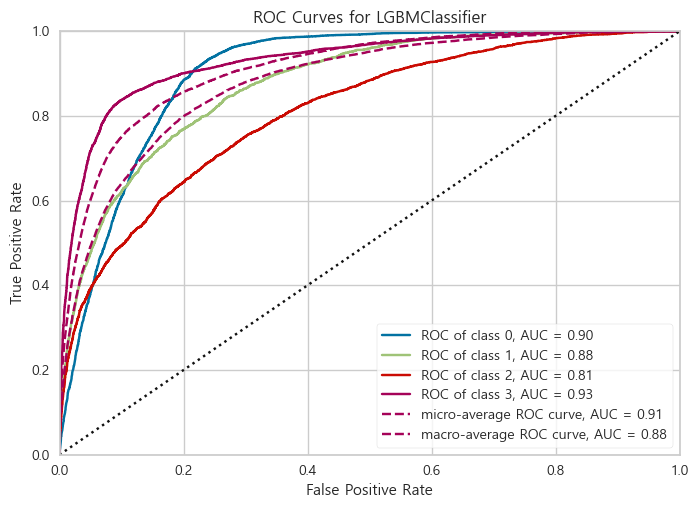

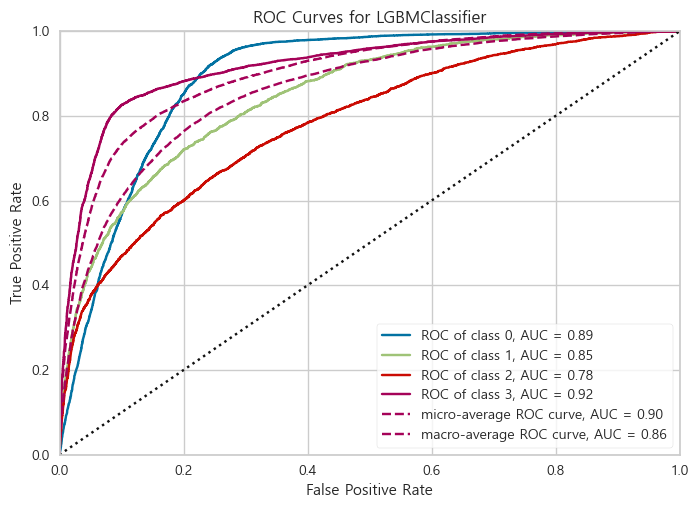

In [15]:
# functional API
plot_model(best, plot = 'auc')

# OOP API
s.plot_model(best, plot = 'auc')

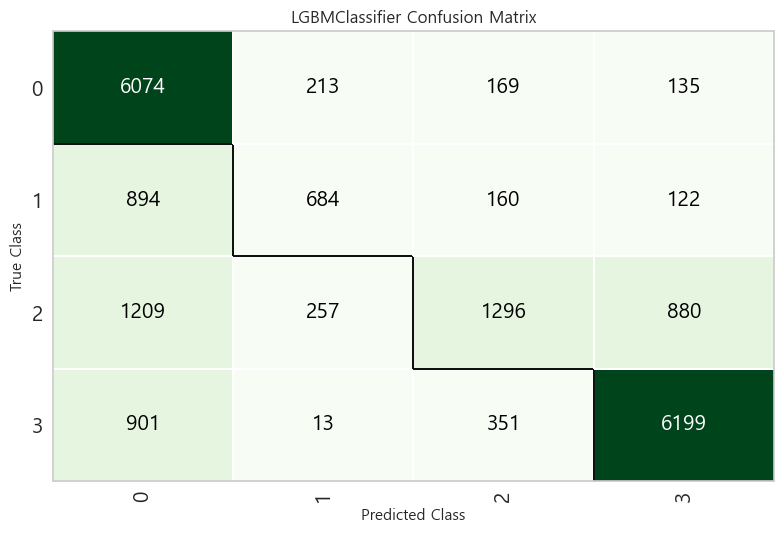

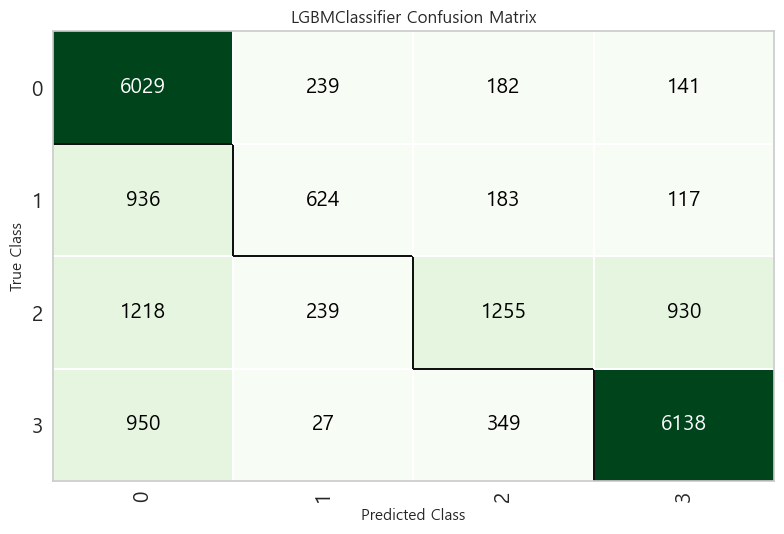

In [16]:
# functional API
plot_model(best, plot = 'confusion_matrix')

# OOP API
s.plot_model(best, plot = 'confusion_matrix')

In [17]:
# functional API
predict_model(best)

# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7288,0.8928,0.7288,0.7259,0.7099,0.5988,0.6107


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7182,0.8762,0.7182,0.7135,0.6982,0.5828,0.5949


,총거래물량(kg),평균가격(원),총거래금액(원),거래단위,등급명,prediction_label,prediction_score
60179,20.0,2000.000000,2000,20.0,0,0,0.6352
2023,3180.0,69171.695312,10998300,20.0,2,0,0.4939
27736,1650.0,28004.242188,4620700,10.0,3,3,0.9511
9624,1870.0,33506.953125,6265800,10.0,3,3,0.9456
51535,2400.0,60345.832031,7241500,20.0,0,0,0.5807
...,...,...,...,...,...,...,...
57102,1550.0,34183.871094,5298500,10.0,2,3,0.9232
51008,1020.0,39778.429688,2028700,20.0,0,0,0.4895
3723,1250.0,63240.000000,7905000,10.0,3,3,0.8988
32108,80.0,24600.000000,98400,20.0,0,0,0.6924


In [18]:

# functional API
predictions = predict_model(best, data=df_temp)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=df_temp)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7285,0.8937,0.7285,0.7262,0.7094,0.5982,0.6104


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7285,0.8937,0.7285,0.7262,0.7094,0.5982,0.6104


,총거래물량(kg),평균가격(원),총거래금액(원),거래단위,등급명,prediction_label,prediction_score
0,1800.0,62366.667969,11226000,10.0,3,3,0.9048
1,3840.0,95000.000000,36480000,10.0,3,3,0.9884
2,1200.0,60900.000000,7308000,10.0,3,3,0.9106
3,600.0,61300.000000,3678000,10.0,3,3,0.8864
4,3520.0,152875.562500,26906100,20.0,0,0,0.6484


In [19]:
# functional API
predictions = predict_model(best, data=df_temp, raw_score=True)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=df_temp, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7285,0.8937,0.7285,0.7262,0.7094,0.5982,0.6104


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7285,0.8937,0.7285,0.7262,0.7094,0.5982,0.6104


,총거래물량(kg),평균가격(원),총거래금액(원),거래단위,등급명,prediction_label,prediction_score_0,prediction_score_1,prediction_score_2,prediction_score_3
0,1800.0,62366.667969,11226000,10.0,3,3,0.0541,0.0027,0.0384,0.9048
1,3840.0,95000.000000,36480000,10.0,3,3,0.0047,0.0004,0.0065,0.9884
2,1200.0,60900.000000,7308000,10.0,3,3,0.0420,0.0031,0.0443,0.9106
3,600.0,61300.000000,3678000,10.0,3,3,0.0083,0.0076,0.0978,0.8864
4,3520.0,152875.562500,26906100,20.0,0,0,0.6484,0.0473,0.0297,0.2745


In [20]:
# functional API
save_model(best, 'my_best_apple')

# OOP API
s.save_model(best, 'my_best_apple')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['총거래물량(kg)', '평균가격(원)', '총거래금액(원)',
                                              '거래단위'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, imp

In [21]:
# functional API
loaded_model = load_model('my_best_apple')
print(loaded_model)

# OOP API
loaded_model = s.load_model('my_best_apple')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\jhi08\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['총거래물량(kg)', '평균가격(원)', '총거래금액(원)',
                                             '거래단위'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Tra...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                   